# PCA e LDA
Na aula de hoje iremos ver o funcionamento e aplicações dos algoritmos de **Extração de Features** PCA e LDA.
### Roteiro:
1. Conceito de Extração de Features.
2. Porquê ultilzar redutores de dimensionalidade.
3. PCA
  * Funcionamento do PCA
  * Utilizações
    * Aceleração do treinamento
    * Melhoramento de performance
    * Vizualização de dados
  * Vantagens e Desvantagens
4. LDA
  1. Funcionamento do LDA
  2. Quando ultilizar
  3. Vantagens e Desvantagens

# PCA - Principal Component Analysis

In [1]:
# Todos os imports necessários
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import sklearn.datasets as datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

%matplotlib inline

## Funcionamento do PCA

### <q><b>O PCA realiza uma rotação dos eixos do plano de modo a maximizar a variação dos dados de forma ordinal em cada componente<b/></q>

<img style="height:700px;" src="files/images/pca_graph_2d.png">
<img style="height:700px;" src="files/images/pca_graph_3d.png">

### Passo a Passo

1. Extraia a matriz de covariância dos dados
2. Calcule os auto-valores e auto-vetores
3. Selecione quais componentes usar através os auto-valores
3. Mutiplique os auto-vetores selecionados pelos dados originais

In [3]:
# data = np.array([[1, 2], [3, 4]])
data = datasets.load_iris()
data = data.data
data = StandardScaler().fit_transform(data)
# print(data.T)
# print(np.cov(data.T).shape)
eig_vals, eig_vecs = np.linalg.eig(np.cov(data.T))

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()


tot = sum(eig_vals)
var_exp = [(i / tot) for i in sorted(eig_vals, reverse=True)]
# cum_var_exp = np.cumsum(var_exp)
# print(cum_var_exp)

matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

x = data.dot(matrix_w)

# print(x[:3,:])

pca = PCA(n_components=2)
pca.fit(data)
data_t = pca.transform(data)
print(pca.explained_variance_ratio_)
# print(data_t[:3,:])

[0.72770452 0.23030523]


## Data Vizualization

Abaixo veremos a diferença entre tentar vizualizar os dados sem e com o PCA nos planos 2D e 3D

### 2D

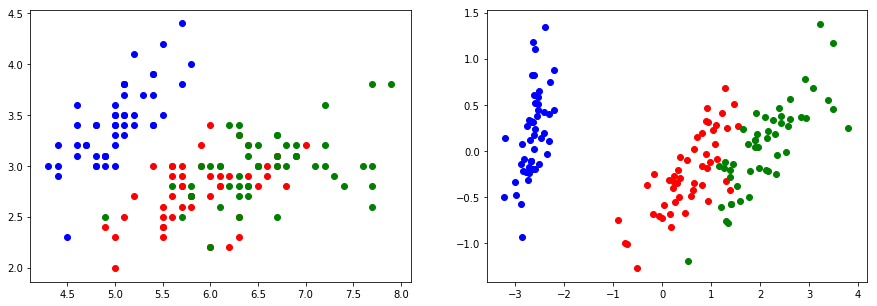

In [13]:
iris_dataset = datasets.load_iris()

X = iris_dataset.data
Y = iris_dataset.target

colors = ['blue', 'red', 'green']

fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], c=colors[Y[i]], )
    
pca = PCA()
pca.fit(X)
X = pca.transform(X)

plt.subplot(1, 2, 2)
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], c=colors[Y[i]])
plt.show()

### 3D

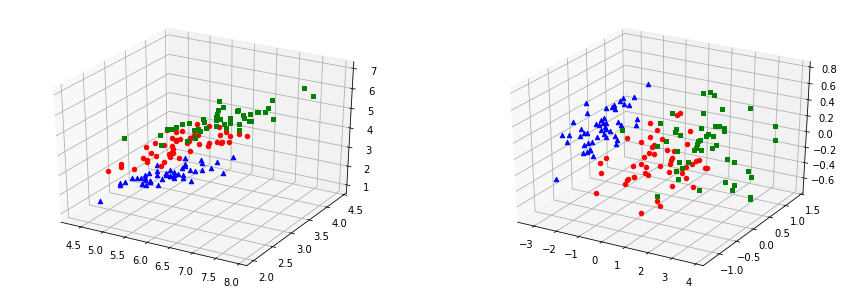

In [32]:
iris_dataset = datasets.load_iris()

X = iris_dataset.data
Y = iris_dataset.target

colors = ['blue', 'red', 'green']
markers = ['^', 'o', 's']

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 2, 1, projection='3d')

for i in range(X.shape[0]):
    ax.scatter(X[i, 0], X[i, 1], X[i, 2], c=colors[Y[i]], marker=markers[Y[i]])
    
pca = PCA()
pca.fit(X)
X = pca.transform(X)

ax = fig.add_subplot(1, 2, 2, projection='3d')
for i in range(X.shape[0]):
    ax.scatter(X[i, 0], X[i, 1], X[i, 2], c=colors[Y[i]], marker=markers[Y[i]])
plt.show()

## Aumento da Acurácia e Melhora de Performance

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split

data = datasets.load_breast_cancer()
X = data.data
Y = data.target
print("Data shape before PCA: ", X.shape)

knn = KNeighborsClassifier(n_neighbors=5)
mlp = MLPClassifier()
scores_knn = cross_val_score(knn, X, Y, cv=10)
scores_mlp = cross_val_score(mlp, X, Y, cv=10)
print("Accuracy before PCA(KNN): %0.4f (+/- %0.4f)" % (scores_knn.mean(), scores_knn.std() * 2))
print("Accuracy before PCA(MLP): %0.4f (+/- %0.4f)" % (scores_mlp.mean(), scores_mlp.std() * 2))

pca = PCA(.95)
pca.fit(X)
print(pca.explained_variance_ratio_)
X = pca.transform(X)
print("Data shape after PCA: ", X.shape)

knn = KNeighborsClassifier(n_neighbors=5)
mlp = MLPClassifier()
scores_knn = cross_val_score(knn, X, Y, cv=10)
scores_mlp = cross_val_score(mlp, X, Y, cv=10)
print("Accuracy after PCA(KNN): %0.4f (+/- %0.4f)" % (scores_knn.mean(), scores_knn.std() * 2))
print("Accuracy after PCA(MLP): %0.4f (+/- %0.4f)" % (scores_mlp.mean(), scores_mlp.std() * 2))

Data shape before PCA:  (569, 30)
Accuracy before PCA(KNN): 0.9298 (+/- 0.0578)
Accuracy before PCA(MLP): 0.8181 (+/- 0.3580)
[0.98204467]
Data shape after PCA:  (569, 1)
Accuracy after PCA(KNN): 0.9089 (+/- 0.0747)
Accuracy after PCA(MLP): 0.9089 (+/- 0.0659)


# LDA - Linear Discriminant Analysis

## Funcionamento do LDA

### <q><b>O LDA realiza uma rotação dos eixos do plano de modo a maximizar a melhor separação dos dados de forma ordinal em cada discriminante<b/></q>


<img style="height:400px;" src="files/images/lda_graph.png">
<!-- <img style="height:700px;" src="files/images/pca_graph_3d.png"> -->

### Passo a Passo

1. Compute the d-dimensional mean vectors for the different classes from the dataset.
2. Compute the scatter matrices (in-between-class and within-class scatter matrix).
3. Compute the eigenvectors (ee1,ee2,...,eed) and corresponding eigenvalues (λλ1,λλ2,...,λλd) for the scatter matrices.
4. Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d×k dimensional matrix WW (where every column represents an eigenvector).
5. Use this d×k eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the matrix multiplication: YY=XX×WW (where XX is a n×d-dimensional matrix representing the n samples, and yy are the transformed n×k-dimensional samples in the new subspace).

[0.99147248 0.00852752] [0 1 2]
(150, 2)


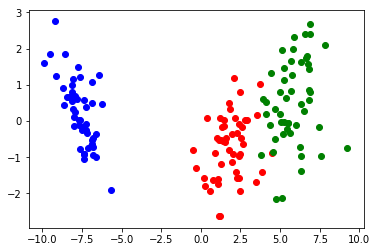

In [34]:
iris_dataset = datasets.load_iris()

X = iris_dataset.data
Y = iris_dataset.target

lda = LinearDiscriminantAnalysis()
lda.fit(X, Y)
print(lda.explained_variance_ratio_, lda.classes_)
X = lda.transform(X)
print(X.shape)
colors = ['blue', 'red', 'green']

for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], c=colors[Y[i]])
plt.show()

## Data Vizualization

Abaixo veremos a diferença entre tentar vizualizar os dados sem e com o PCA nos planos 2D e 3D

### 2D

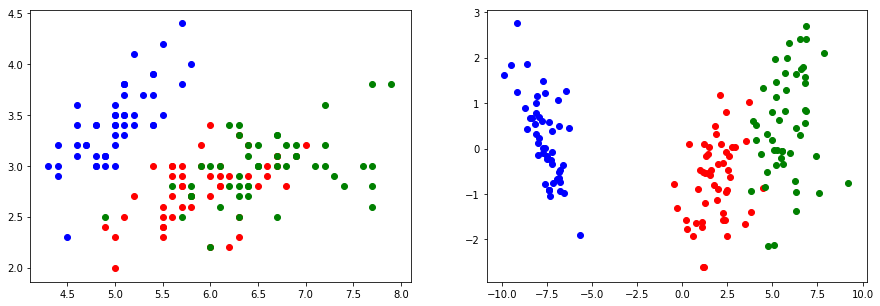

In [14]:
iris_dataset = datasets.load_iris()

X = iris_dataset.data
Y = iris_dataset.target

colors = ['blue', 'red', 'green']

fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], c=colors[Y[i]], )
    
lda = LinearDiscriminantAnalysis()
lda.fit(X, Y)
X = lda.transform(X)

plt.subplot(1, 2, 2)
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], c=colors[Y[i]])
plt.show()

### 3D

[0.99147248 0.00852752]


IndexError: index 2 is out of bounds for axis 1 with size 2

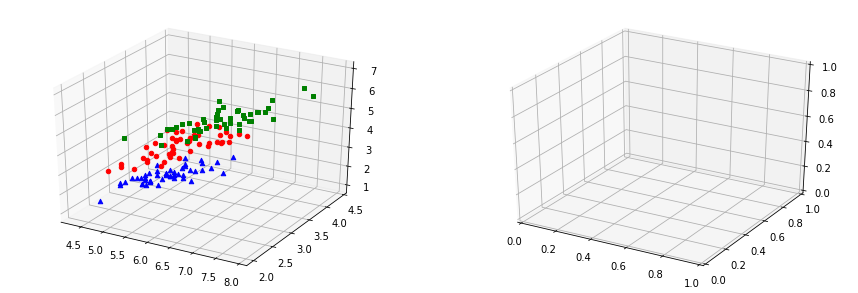

In [36]:
iris_dataset = datasets.load_iris()

X = iris_dataset.data
Y = iris_dataset.target

colors = ['blue', 'red', 'green']
markers = ['^', 'o', 's']

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 2, 1, projection='3d')

for i in range(X.shape[0]):
    ax.scatter(X[i, 0], X[i, 1], X[i, 2], c=colors[Y[i]], marker=markers[Y[i]])
    
lda = LinearDiscriminantAnalysis(n_components=4)
lda.fit(X, Y)
print(lda.explained_variance_ratio_)
X = lda.transform(X)

ax = fig.add_subplot(1, 2, 2, projection='3d')
for i in range(X.shape[0]):
    ax.scatter(X[i, 0], X[i, 1], X[i, 2], c=colors[Y[i]], marker=markers[Y[i]])
plt.show()

## Aumento da Acurácia e Melhora de Performance

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split

data = datasets.load_breast_cancer()
X = data.data
Y = data.target
print("Data shape before PCA: ", X.shape)

knn = KNeighborsClassifier(n_neighbors=5)
mlp = DecisionTreeClassifier()
scores_knn = cross_val_score(knn, X, Y, cv=10)
scores_mlp = cross_val_score(mlp, X, Y, cv=10)
print("Accuracy before PCA(KNN): %0.4f (+/- %0.4f)" % (scores_knn.mean(), scores_knn.std() * 2))
print("Accuracy before PCA(MLP): %0.4f (+/- %0.4f)" % (scores_mlp.mean(), scores_mlp.std() * 2))

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X, Y)
print(lda.explained_variance_ratio_)
X = lda.transform(X)
print("Data shape after PCA: ", X.shape)

knn = KNeighborsClassifier(n_neighbors=5)
mlp = MLPClassifier()
scores_knn = cross_val_score(knn, X, Y, cv=10)
scores_mlp = cross_val_score(mlp, X, Y, cv=10)
print("Accuracy after PCA(KNN): %0.4f (+/- %0.4f)" % (scores_knn.mean(), scores_knn.std() * 2))
print("Accuracy after PCA(MLP): %0.4f (+/- %0.4f)" % (scores_mlp.mean(), scores_mlp.std() * 2))

Data shape before PCA:  (569, 30)
Accuracy before PCA(KNN): 0.9298 (+/- 0.0578)
Accuracy before PCA(MLP): 0.9123 (+/- 0.0637)
[1.]
Data shape after PCA:  (569, 1)
Accuracy after PCA(KNN): 0.9755 (+/- 0.0356)
Accuracy after PCA(MLP): 0.9772 (+/- 0.0417)


# Comparações

## Vantagens

<ol>
    <li>Redução da dimensionalidade</li>
    <li>Automento de performance</li>
    <li>Aumento de precisão</li>
</ol>

## Desvantagens
    
<ol>
    <li>Após reduzir os dados não é possivel voltar a sua forma original</li>
    <li>Na necessidade de incluir novos dados de treinamento o processo precisará ser refeito para todo o dataset</li>
    <li>Pode-se perder a "representatividade" do dado, caso essa informação seja necessaria</li>
</ol>

## Semelhanças

<ol>
    <li>Ambos realização uma rotação nos eixos dos dados</li>
    <li>Ambos procuram maximzar alguma caracteristica dos dados</li>
</ol>

## Diferenças

<ol>
    <li>O LDA utiliza as classes para realizar a redução enquanto o PCA não</li>
    <li>O PCA busca maximar a variância dos dados enquanto o LDA busca maximizar a separação entre os mesmos</li>
</ol>